<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/electric_potential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=dKCAVteveYc

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib import cm
from skimage import color
from skimage import io
import numba
from numba import jit

In [ ]:
edge = np.linspace(-1, 1, 300)
upper_y = np.cos(np.pi * edge / 2)
lower_y = edge**4
upper_x = 1 / (np.e** - 1 - np.e) * (np.exp(edge) - np.e)
lower_x = 0.5 * (edge**2 - edge)

xv, yv = np.meshgrid(edge, edge)

@numba.jit("f8[:,:](f8[:,:], i8)", nopython=True, nogil=True)
def compute_potential(potential, n_iter):
    length = len(potential[0])
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1, length-1):
                potential[j][i] = 1/4 * (potential[j + 1][i] + potential[j - 1][i] + potential[j][i + 1] + potential[j][i - 1])
    return potential

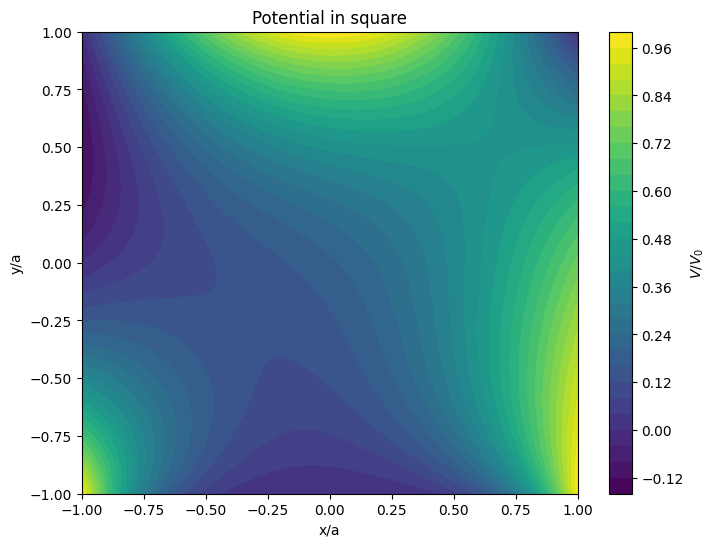

In [ ]:
potential = np.zeros((300, 300))
potential[0, :]= lower_y
potential[-1, :]= upper_y
potential[:, 0]= lower_x
potential[:, -1]= upper_x
potential = compute_potential(potential, n_iter=10000)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
clr_plot = ax.contourf(xv, yv, potential, 30)
ax.set_xlabel('x/a')
ax.set_ylabel('y/a')
fig.colorbar(clr_plot, label='$V/V_0$')
ax.set_title('Potential in square')
plt.show()

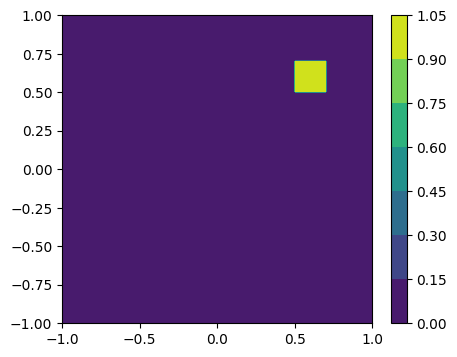

In [ ]:
def potential_block(x, y):
    return np.select([(x > 0.5) * (x < 0.7) * (y > 0.5) * (y < 0.7),
                      (x <= 0.5) + (x >= 0.7) + (y <= 0.5) + (y >= 0.7)],
                     [1, 0])

plt.figure(figsize=(5,4))
plt.contourf(xv, yv, potential_block(xv,yv))
plt.colorbar()

In [ ]:
fixed = potential_block(xv,yv)
fixed_bool = fixed!=0

@numba.jit("f8[:,:](f8[:,:], b1[:,:], i8)", nopython=True, nogil=True)
def compute_potential_fixed(potential, fixed_bool, n_iter):
    length = len(potential[0])
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1, length - 1):
                if not(fixed_bool[j][i]):
                    potential[j][i] = 1/4 * (potential[j + 1][i] + potential[j - 1][i] + potential[j][i + 1] + potential[j][i - 1])
    return potential

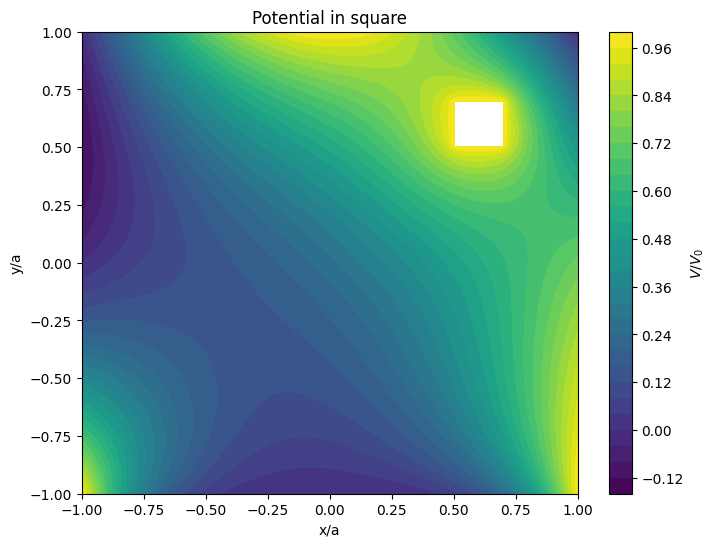

In [ ]:
potential = np.zeros((300, 300))
potential[0,:]= lower_y
potential[-1,:]= upper_y
potential[:,0]= lower_x
potential[:,-1]= upper_x
potential[fixed_bool] = fixed[fixed_bool]
potential = compute_potential_fixed(potential, fixed_bool, n_iter=10000)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
clr_plot = ax.contourf(xv, yv, potential, 30)
ax.set_xlabel('x/a')
ax.set_ylabel('y/a')
fig.colorbar(clr_plot, label='$V/V_0$')
ax.set_title('Potential in square')
plt.show()

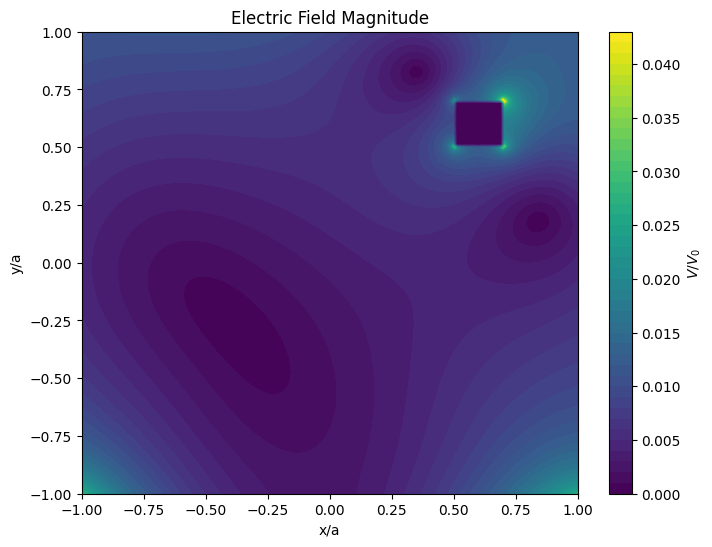

In [ ]:
Ex, Ey = np.gradient(-potential)
E_mag = np.sqrt(Ex**2 + Ey**2)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
clr_plot = ax.contourf(xv, yv, E_mag, 50)
ax.set_xlabel('x/a')
ax.set_ylabel('y/a')
fig.colorbar(clr_plot, label='$V/V_0$')
ax.set_title('Electric Field Magnitude')
plt.show()

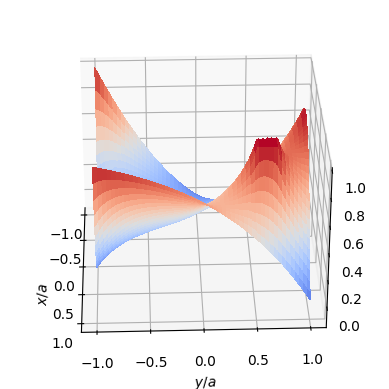

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

def init():
    ax.plot_surface(xv, yv, potential, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_xlabel('$x/a$')
    ax.set_ylabel('$y/a$')
    return fig,

def animate(i):
    ax.view_init(elev=30, azim=2 * i)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=180, interval=50)
ani.save('rotate_azimuth_angle_3d_surf.gif', writer='pillow', fps=20)